In [1]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
import wfdb
import os 
import glob
import wfdb.processing
from astropy.timeseries import LombScargle
import antropy as ant

import warnings
warnings.filterwarnings('ignore')

# DATASETS

In [2]:
chf_signals_records=pd.read_csv('files/Records_Signals.csv')             #dataframe for records of signals of chf subjects
chf_annotations_records=pd.read_csv('files/Records_Annotations.csv')     #dataframe for records of annotations of chf subjects
 
normal_signals_records=pd.read_csv('normal/Records_Signals.csv')          #dataframe for records of signals of normal subjects
normal_annotations_records=pd.read_csv('normal/Records_Annotations.csv')  #dataframe for records of annotations of normal subjects

In [3]:
#viewing the dataframe of signal records of chf subjects
chf_signals_records

,Unnamed: 0,record_id,fs,sig_len,n_sig,base_date,base_time,units,sig_name,age,sex,NYHA class
0,0,chf01,250,17994491,2,NaN,10:00:00,"['mV', 'mV']","['ECG1', 'ECG2']",['71'],['M'],['III-IV']
1,1,chf02,250,17793024,2,NaN,13:22:00,"['mV', 'mV']","['ECG1', 'ECG2']",['61'],['F'],['III-IV']
2,2,chf03,250,17998848,2,NaN,08:35:00,"['mV', 'mV']","['ECG1', 'ECG2']",['63'],['M'],['III-IV']
3,3,chf04,250,17998848,2,NaN,14:30:00,"['mV', 'mV']","['ECG1', 'ECG2']",['54'],['M'],['III-IV']
4,4,chf05,250,17802240,2,NaN,08:26:00,"['mV', 'mV']","['ECG1', 'ECG2']",['59'],['F'],['III-IV']
5,5,chf06,250,17789952,2,NaN,14:35:00,"['mV', 'mV']","['ECG1', 'ECG2']",['?'],['M'],['III-IV']
6,6,chf07,250,17998848,2,NaN,12:12:00,"['mV', 'mV']","['ECG1', 'ECG2']",['48'],['M'],['III-IV']
7,7,chf08,250,17998848,2,NaN,08:19:00,"['mV', 'mV']","['ECG1', 'ECG2']",['51'],['M'],['III-IV']
8,8,chf09,250,17796577,2,NaN,08:05:00,"['mV', 'mV']","['ECG1', 'ECG2']",['63'],['F'],['III-IV']
9,9,chf10,250,17995711,2,NaN,08:17:00,"['mV', 'mV']","['ECG1', 'ECG2']",['22'],['M'],['III-IV']


In [4]:
#viewing the dataframe of signal records of normal subjects
normal_signals_records

,Unnamed: 0,record_id,fs,sig_len,n_sig,base_date,base_time,units,sig_name,age,sex
0,0,16265,128,11730944,2,NaN,08:04:00,"['mV', 'mV']","['ECG1', 'ECG2']",['32'],['M']
1,1,16272,128,11520000,2,NaN,10:45:00,"['mV', 'mV']","['ECG1', 'ECG2']",['20'],['F']
2,2,16273,128,11354112,2,NaN,08:00:00,"['mV', 'mV']","['ECG1', 'ECG2']",['28'],['F']
3,3,16420,128,11051008,2,NaN,09:55:00,"['mV', 'mV']","['ECG1', 'ECG2']",['38'],['F']
4,4,16483,128,11960320,2,NaN,09:54:00,"['mV', 'mV']","['ECG1', 'ECG2']",['42'],['M']
5,5,16539,128,11327488,2,NaN,08:40:00,"['mV', 'mV']","['ECG1', 'ECG2']",['35'],['F']
6,6,16773,128,11046912,2,NaN,09:50:00,"['mV', 'mV']","['ECG1', 'ECG2']",['26'],['M']
7,7,16786,128,11284480,2,NaN,11:48:00,"['mV', 'mV']","['ECG1', 'ECG2']",['32'],['F']
8,8,16795,128,10866688,2,NaN,11:15:00,"['mV', 'mV']","['ECG1', 'ECG2']",['20'],['F']
9,9,17052,128,10659840,2,NaN,11:06:00,"['mV', 'mV']","['ECG1', 'ECG2']",['45'],['F']


In [5]:
#viewing the dataframe of annotation records of chf subjects
chf_annotations_records

,Unnamed: 0,record_id,extension,fs,label_store,description,custom_labels,contained_labels,ann_len
0,0,chf01,ecg,250,NaN,NaN,NaN,NaN,75548
1,1,chf02,ecg,250,NaN,NaN,NaN,NaN,114548
2,2,chf03,ecg,250,NaN,NaN,NaN,NaN,81301
3,3,chf04,ecg,250,NaN,NaN,NaN,NaN,112366
4,4,chf05,ecg,250,NaN,NaN,NaN,NaN,119153
5,5,chf06,ecg,250,NaN,NaN,NaN,NaN,118634
6,6,chf07,ecg,250,NaN,NaN,NaN,NaN,92584
7,7,chf08,ecg,250,NaN,NaN,NaN,NaN,90759
8,8,chf09,ecg,250,NaN,NaN,NaN,NaN,115052
9,9,chf10,ecg,250,NaN,NaN,NaN,NaN,147305


In [6]:
#viewing the dataframe of annotation records of normal subjects
normal_annotations_records

,Unnamed: 0,record_id,extension,fs,label_store,description,custom_labels,contained_labels,ann_len
0,0,16265,atr,128,NaN,NaN,NaN,NaN,100955
1,1,16272,atr,128,NaN,NaN,NaN,NaN,97146
2,2,16273,atr,128,NaN,NaN,NaN,NaN,90097
3,3,16420,atr,128,NaN,NaN,NaN,NaN,102436
4,4,16483,atr,128,NaN,NaN,NaN,NaN,104561
5,5,16539,atr,128,NaN,NaN,NaN,NaN,108674
6,6,16773,atr,128,NaN,NaN,NaN,NaN,112897
7,7,16786,atr,128,NaN,NaN,NaN,NaN,101739
8,8,16795,atr,128,NaN,NaN,NaN,NaN,87678
9,9,17052,atr,128,NaN,NaN,NaN,NaN,88002


We have a missing record in the age group for a chf subject with record_id 'chf06'.

# Preprocessing

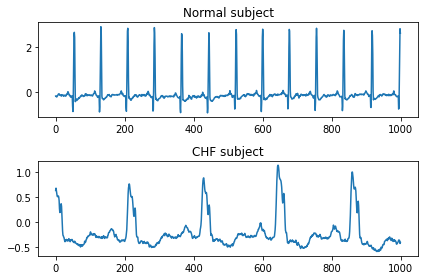

In [7]:
##visualizing a single normal subject and a chf subject
norm_df=pd.read_csv("normal/16265.csv",names=['ECG1','ECG2'])           #creating dataframe of a single normal subject ('16265')       
chf_df=pd.read_csv("files/chf01.csv",names=['ECG1','ECG2'])            #creating dataframe of a single chf subject ('chf01')
#plotting the normal subject for first 1000 samples
plt.subplot(2,1,1)
plt.plot(norm_df['ECG1'][:1000])
plt.title('Normal subject')
#plotting the chf subject for first 1000 samples 
plt.subplot(2,1,2)
plt.plot(chf_df['ECG1'][:1000])
plt.title('CHF subject')
plt.tight_layout()
plt.show()

The chf and normal subjects are having different sampling frequencies. I'm bringing the normal subjects to the sample sampling frequency as that of chf subjects (250 samples per sec) for preprocessing.

In [8]:

dat_files=glob.glob('normal/*.dat')                  #Get list of all .dat files in the current folder

#The MIT-BIH has three channel records
sig_fs=normal_signals_records['fs'][0]    #original sampling frequency, taken from the signal records dataframe of normal subjects
targ_fs=chf_signals_records['fs'][0]      #target sampling frequency, taken from the signal records dataframe of chf subjects

for i in range(len(dat_files)):
    recordname=dat_files[i][:-4]
    print(recordname)
    
    sig,fields = wfdb.rdsamp(recordname) # rdsamp() returns the signal as a numpy array  
    record=np.asarray(sig)
    annts = wfdb.rdann(recordname,extension='atr')# rdann() returns the annotations of a file.
    
    #resampling the signal
    signal,ann=wfdb.processing.resample_multichan(record, annts, fs=sig_fs, fs_target=targ_fs, resamp_ann_chan=0)
    #storing the annotation as a dictionary 
    res_ann=ann.__dict__
    sample = np.asarray(res_ann['sample'])
    symbol = np.asarray(res_ann['symbol'])
    subtype = np.asarray(res_ann['subtype'])
    chan = np.asarray(res_ann['chan'])
    num = np.asarray(res_ann['num'])
    aux_note = np.asarray(res_ann['aux_note'])
    path="normal/"+recordname+"_resampled_annotations.csv"
    with open(path,'w') as f:
        for x in zip(sample,symbol,subtype,chan,num,aux_note):
            f.write("{},{},{},{},{},{}\n".format(x[0], x[1], x[2], x[3], x[4], x[5]))
    f.close()
    
    print("Files done: %s/%s"% (i+1,len(dat_files)))

16265
Files done: 1/18
16272
Files done: 2/18
16273
Files done: 3/18
16420
Files done: 4/18
16483
Files done: 5/18
16539
Files done: 6/18
16773
Files done: 7/18
16786
Files done: 8/18
16795
Files done: 9/18
17052
Files done: 10/18
17453
Files done: 11/18
18177
Files done: 12/18
18184
Files done: 13/18
19088
Files done: 14/18
19090
Files done: 15/18
19093
Files done: 16/18
19140
Files done: 17/18
19830
Files done: 18/18


In [9]:
#detecting the qrs locqtions of a chf subject using xqrs

sig,fields=wfdb.rdsamp('files/chf01')    #reading the samp using wfdb package
xqrs = wfdb.processing.XQRS(sig=sig[:,0], fs=fields['fs'])   #detecting the qrs features using xqrs
xqrs.detect()
qrs_det=xqrs.__dict__                                   #saving the fields as dictionary

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


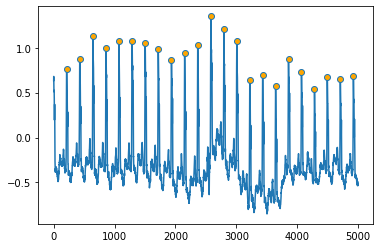

In [10]:
#we can plot first 5000 samples with the qrs indexes
l=qrs_det['qrs_inds'][:23]
plt.plot(chf_df['ECG1'][:5000],markevery=l,marker='o',markerfacecolor='orange')

The xqrs fn returns the peak of qrs complex present within a signal. 

In [11]:
def avg_5_min(r_r,r_peak):                          #fn for finding the SDANN feature where r_r---> R-R interval, r_peak---> indexes of r_peak
    k=[]                                            #empty list for storing qrs indexes
    for n in range(0,240):                          #240 is the batch length  
        m=[]                                        #empty list to store indexes during each batch
        for i in r_peak:
            if i < (n+1)*75000  and i > (n)*75000:  #75000 are sample lengths of each batches 
                m.append(i)
        k.append(m)
    l=np.asarray(k)
    y=[]                                            #empty list to store mean of succesive differences of each batch
    for n in range(0,240):
        y.append(np.mean(np.diff(l[n])))
    return np.std(y)
    
def time_domain_analysis(r_r,r_peak):                 #fn to calculate time measures, where r_r---> R-R interval, r_peak---> indexes of r_peak
        
    heart_rate=np.array([60*fs*1/r_r])                 #heart rate of each RR intervals
    avg_heart_rate=np.mean(heart_rate)               #average value of heart rate
    mean_abs_deviation_hr=np.mean(abs(heart_rate-avg_heart_rate))   #mean of absolute deviation of heart rate 
    SDNN=np.std(r_r)                                   #std of series of RR intervals
    SDANN=avg_5_min(r_r,r_peak)                        #std of the average RR interval calculated over 5-min intervals within the entire period of recording
    SDSD=np.std(np.diff(r_r))                          #std of successive differences of adjacent rr-intervals
    RMSSD=np.sqrt(np.mean((np.diff(r_r))**2))          #square root of the mean squared differences of consecutive RR intervals
    NN50=np.count_nonzero(np.diff(r_r)>(50*fs/1000))   #number of pairs of adjacent RR intervals differing by more than 50 ms
    #here our sampling rate is 250 samples per sec. So for 1 sample we have 4 ms. For 50 ms we have 12.5 samples
    pNN50=NN50/len(r_r)                                #proportion of RR intervals differing by more than 50 ms
    NN20=np.count_nonzero(np.diff(r_r)>(20*fs/1000))   #number of pairs of adjacent RR intervals differing by more than 20 ms
    pNN20=NN20/len(r_r)                                #proportion of RR intervals differing by more than 20 ms
    #pNN20 for elderly healthy subjects versus younger patients with CHF 
    NN12=np.count_nonzero(np.diff(r_r)>(12*fs/1000))   #number of pairs of adjacent RR intervals differing by more than 12 ms
    pNN12=NN12/len(r_r)                                #proportion of RR intervals differing by more than 20 ms
    #pNN12 for the normal versus CHF groups

    #creating a dictionary
    features={}                                       #empty dictionary to store time measures
    features['heart_rate_avg']=avg_heart_rate
    features['MAD_heart_rate']=mean_abs_deviation_hr
    features['SDNN']=SDNN
    features['SDANN']=SDANN
    features['SDSD']=SDSD
    features['RMSSD']=RMSSD
    features['NN50']=NN50
    features['pNN50']=pNN50
    features['NN20']=NN20
    features['pNN20']=pNN20
    features['NN12']=NN12
    features['pNN12']=pNN12

    return features

def frequency_domain_analysis(r_r):                         #fn to calculate frequency measures, where r_r---> R-R interval

    sample_times=np.array(range(len(r_r)))                  #time as sample numbers
    frequency, power = LombScargle(sample_times, r_r).autopower()

    #conditions for various bands
    cond_ulf = (frequency >= 0) & (frequency <= 0.003)      # - Ultra Low Frequency (ULF): 0-0.003
    cond_vlf = (frequency >= 0.003) & (frequency <= 0.04)   # - Very Low Frequency (VLF): 0.003-0.04Hz 
    cond_lf = (frequency >= 0.04) & (frequency <= 0.15)     # - Low Frequency (LF): 0.04-0.15Hz
    cond_hf = (frequency >= 0.15) & (frequency < 0.4)       # - High Frequency (HF): 0.15-0.4Hz

    #integral power by trapezoidal rule
    ulf = np.trapz(power[cond_ulf], frequency[cond_ulf])
    vlf = np.trapz(power[cond_vlf], frequency[cond_vlf])
    lf = np.trapz(power[cond_lf], frequency[cond_lf])
    hf = np.trapz(power[cond_hf], frequency[cond_hf])
    total_power= ulf + vlf + lf + hf
    lf_hf_ratio= lf/hf

    #creating a dictionary 
    features={}                                            #empty dictionary to store frequency measures
    features['ULF_Power'] = ulf
    features['VLF_Power'] = vlf
    features['LF_Power'] = lf
    features['HF_Power'] = hf
    features['Total_Power'] = total_power
    features['Ratio_LF/HF'] = lf_hf_ratio

    return features

def non_linear_domain_analysis(r_r):                     #fn to calculate non-linear measures, where r_r---> R-R interval

    #Poincaré analysis
    x_1 = r_r[:-1]                             #list of all intervals excluding the last interval
    x_2 = r_r[1:]                              #list of all intervals excluding the first interval  
    sd1 = np.sqrt(0.5) * np.std(x_2 - x_1)     #linear scaling of measures of short-term HRV
    sd2 = np.sqrt(0.5) * np.std(x_2 + x_1)     #linear scaling of measures of long-term HRV
    sd1_sd2_ratio = sd1/sd2 

    #detrended fluctuation analysis
    alpha = ant.detrended_fluctuation(r_r)      # scaling exponent a, the slope of the line relating log F(n) to log n.

    #entropy is the measure of the degree of irregularity or disorder within the signal
    #sample entropy analysis
    sample_en = ant.sample_entropy(r_r)

    #approximate entropy analysis
    App_en = ant.app_entropy(r_r)

    #creating a dictionary
    features={}                               #empty dictionary to store the non-linear measures
    features['SD1'] = sd1
    features['SD2'] = sd2
    features['SD1_SD2_ratio'] = sd1_sd2_ratio
    features['Alpha_DFA'] = alpha
    features['Sample_En'] = sample_en
    features['Approximate_En'] = App_en

    return features    

def satistical_domain_analysis(r_r):             #fn to calculate statistical measures, where r_r---> R-R interval

    mean = np.mean(r_r)
    std = np.std(r_r)
    skewness = scipy.stats.skew(r_r)
    kurtosis = scipy.stats.kurtosis(r_r)

    #creating a dictionary
    features={}                                  #empty dictionary to store the statistical features
    features['Mean'] = mean
    features['Standard_dev'] = std
    features['Skewness'] = skewness
    features['Kurtosis'] = kurtosis

    return features

In [12]:

dat_files=glob.glob('files/*.dat')                                     #Get list of all .dat files in the current folder
  
df_features=pd.DataFrame(columns=['heart_rate_avg','MAD_heart_rate','SDNN','SDANN','SDSD','RMSSD','NN50','pNN50','NN20','pNN20','NN12','pNN12',
                                 'ULF_Power','VLF_Power','LF_Power','HF_Power','Total_Power','Ratio_LF/HF','SD1','SD2','SD1_SD2_ratio','Alpha_DFA',
                                 'Sample_En','Approximate_En','Mean','Standard_dev','Skewness','Kurtosis'])
fs=250                                                          #sampling frequency
for k in range(len(dat_files)):
    recordname=dat_files[k][:-4]
    sig,fields = wfdb.rdsamp(recordname)                         # rdsamp() returns the signal as a numpy array 
    xqrs = wfdb.processing.XQRS(sig=sig[:,0], fs=fields['fs'])   #detecting the qrs features using xqrs
    xqrs.detect()
    qrs_det=xqrs.__dict__                                        #saving the fields as dictionary
    r_peak_locs=qrs_det['qrs_inds']
    
    r_peak_loc=np.array(r_peak_locs)
    rr_interval=np.diff(r_peak_loc)                               #calculates the difference of successive peaks
    
    time_measures=time_domain_analysis(rr_interval,r_peak_loc)
    frequency_measures=frequency_domain_analysis(rr_interval)
    non_linear_measures=non_linear_domain_analysis(rr_interval)
    statistical_measures=satistical_domain_analysis(rr_interval)
    
    attributes={}                                            #empty dictionary to store all the features
    attributes.update(time_measures)
    attributes.update(frequency_measures)
    attributes.update(non_linear_measures)
    attributes.update(statistical_measures)
    
    ds=pd.DataFrame(attributes,index=[0,],columns=['heart_rate_avg','MAD_heart_rate','SDNN','SDANN','SDSD','RMSSD','NN50','pNN50','NN20','pNN20','NN12','pNN12',
                                 'ULF_Power','VLF_Power','LF_Power','HF_Power','Total_Power','Ratio_LF/HF','SD1','SD2','SD1_SD2_ratio','Alpha_DFA',
                                 'Sample_En','Approximate_En','Mean','Standard_dev','Skewness','Kurtosis'])
    df_features=df_features.append(ds,ignore_index=True)
    
    print("Files done: %s/%s"% (k+1,len(dat_files)))

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Files done: 1/15
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Files done: 2/15
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Files done: 3/15
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Files done: 4/15
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Files done: 5/15
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS

In [13]:

dat_files=glob.glob('normal/*.dat')                                     #Get list of all .dat files in the current folder
  
fs=250                                              #sampling frequency 250
for k in range(len(dat_files)):
    recordname=dat_files[k][:-4]
    
    sig,fields = wfdb.rdsamp(recordname) # rdsamp() returns the signal as a numpy array  
    record=np.asarray(sig)
    annts = wfdb.rdann(recordname,extension='atr')# rdann() returns the annotations of a file.
    
    #resampling the signal
    signal,ann=wfdb.processing.resample_multichan(record, annts, fs=fields['fs'], fs_target=fs, resamp_ann_chan=0)
    
    xqrs = wfdb.processing.XQRS(sig=signal[:,0], fs=fs)   #detecting the qrs features using xqrs
    xqrs.detect()
    qrs_det=xqrs.__dict__                                        #saving the fields as dictionary
    r_peak_locs=qrs_det['qrs_inds']
    
    r_peak_loc=np.array(r_peak_locs)
    rr_interval=np.diff(r_peak_loc)                               #calculates the difference of successive peaks
    
    time_measures=time_domain_analysis(rr_interval,r_peak_loc)
    frequency_measures=frequency_domain_analysis(rr_interval)
    non_linear_measures=non_linear_domain_analysis(rr_interval)
    statistical_measures=satistical_domain_analysis(rr_interval)
    
    attributes={}                                     #empty dictionary to store all features
    attributes.update(time_measures)
    attributes.update(frequency_measures)
    attributes.update(non_linear_measures)
    attributes.update(statistical_measures)
    
    ds=pd.DataFrame(attributes,index=[0,],columns=['heart_rate_avg','MAD_heart_rate','SDNN','SDANN','SDSD','RMSSD','NN50','pNN50','NN20','pNN20','NN12','pNN12',
                                 'ULF_Power','VLF_Power','LF_Power','HF_Power','Total_Power','Ratio_LF/HF','SD1','SD2','SD1_SD2_ratio','Alpha_DFA',
                                 'Sample_En','Approximate_En','Mean','Standard_dev','Skewness','Kurtosis'])
    df_features=df_features.append(ds,ignore_index=True)
    
    print("Files done: %s/%s"% (k+1,len(dat_files)))

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Files done: 1/18
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Files done: 2/18
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Files done: 3/18
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Files done: 4/18
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Files done: 5/18
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS

In [14]:
#viewing the dataframe
df_features

,heart_rate_avg,MAD_heart_rate,SDNN,SDANN,SDSD,RMSSD,NN50,pNN50,NN20,pNN20,...,SD1,SD2,SD1_SD2_ratio,Alpha_DFA,Sample_En,Approximate_En,Mean,Standard_dev,Skewness,Kurtosis
0,63.753572,4.826335,29.352261,18.691211,29.912081,29.912081,5764,0.076303,13587,0.179863,...,21.151035,35.717667,0.592173,0.942103,0.515104,9.319835e-01,238.203452,29.352261,19.626250,1260.930338
1,102.442891,15.830900,773.270787,NaN,1091.862162,176.735686,23183,0.208877,24280,0.218760,...,772.063139,774.483499,0.996875,0.511191,0.022538,4.975796e-02,160.311049,773.270787,148.123162,22022.822309
2,68.564572,4.803938,32.455582,12.412361,41.340105,41.340105,4298,0.053039,6199,0.076499,...,29.231869,35.387145,0.826059,0.843486,0.215888,5.186475e-01,222.111965,32.455582,55.778400,5916.526187
3,94.690594,7.170153,451.318260,NaN,637.482091,142.556694,6478,0.058228,9871,0.088726,...,450.767910,451.871980,0.997557,0.533877,0.003064,6.274059e-03,161.782736,451.318260,327.171237,108309.954867
4,101.105805,7.498499,29.278112,NaN,37.178068,37.178068,1591,0.013416,4228,0.035652,...,26.288864,31.989404,0.821799,0.754400,0.187962,3.151138e-01,150.115119,29.278112,38.349184,2310.932454
5,102.546497,13.748364,24.411565,NaN,33.309696,33.309696,24028,0.202963,25197,0.212838,...,23.553512,25.240603,0.933160,0.849141,0.862406,1.402350e+00,150.269120,24.411565,0.345203,0.972262
6,79.452392,7.428409,28.872988,14.871191,36.784496,36.784496,4135,0.044491,6964,0.074930,...,26.010566,31.476436,0.826350,0.881992,0.267006,5.389244e-01,193.659684,28.872988,16.829494,1335.130675
7,76.364885,5.031093,17.774836,13.567283,14.418067,14.418067,1294,0.014253,3419,0.037660,...,10.195113,22.976459,0.443720,0.995130,0.527919,6.815035e-01,198.251347,17.774836,0.285484,15.890362
8,97.342283,4.780672,22.074161,NaN,28.380019,28.380019,1405,0.012259,3025,0.026393,...,20.067704,23.912984,0.839197,0.747741,0.214080,3.352947e-01,155.273536,22.074161,35.796209,2223.032589
9,123.766544,3.896656,9.000281,4.856685,10.518485,10.518485,211,0.001425,264,0.001782,...,7.437692,10.329076,0.720073,0.846944,0.447108,5.377123e-01,121.503200,9.000281,58.167649,6910.214508


In [15]:
#saving the features
df_features.to_csv("normal/Features_hrv.csv")

In [16]:
#creating a copy of the dataframe and adding labels :   chf--->1  |  normal--->0
h=[]                            #empty list to store labels 
for i in range(0,33):
    if i<15:
        h.append(1)
    else:
        h.append(0)
features=df_features.copy()
features['label']=h
features

,heart_rate_avg,MAD_heart_rate,SDNN,SDANN,SDSD,RMSSD,NN50,pNN50,NN20,pNN20,...,SD2,SD1_SD2_ratio,Alpha_DFA,Sample_En,Approximate_En,Mean,Standard_dev,Skewness,Kurtosis,label
0,63.753572,4.826335,29.352261,18.691211,29.912081,29.912081,5764,0.076303,13587,0.179863,...,35.717667,0.592173,0.942103,0.515104,9.319835e-01,238.203452,29.352261,19.626250,1260.930338,1
1,102.442891,15.830900,773.270787,NaN,1091.862162,176.735686,23183,0.208877,24280,0.218760,...,774.483499,0.996875,0.511191,0.022538,4.975796e-02,160.311049,773.270787,148.123162,22022.822309,1
2,68.564572,4.803938,32.455582,12.412361,41.340105,41.340105,4298,0.053039,6199,0.076499,...,35.387145,0.826059,0.843486,0.215888,5.186475e-01,222.111965,32.455582,55.778400,5916.526187,1
3,94.690594,7.170153,451.318260,NaN,637.482091,142.556694,6478,0.058228,9871,0.088726,...,451.871980,0.997557,0.533877,0.003064,6.274059e-03,161.782736,451.318260,327.171237,108309.954867,1
4,101.105805,7.498499,29.278112,NaN,37.178068,37.178068,1591,0.013416,4228,0.035652,...,31.989404,0.821799,0.754400,0.187962,3.151138e-01,150.115119,29.278112,38.349184,2310.932454,1
5,102.546497,13.748364,24.411565,NaN,33.309696,33.309696,24028,0.202963,25197,0.212838,...,25.240603,0.933160,0.849141,0.862406,1.402350e+00,150.269120,24.411565,0.345203,0.972262,1
6,79.452392,7.428409,28.872988,14.871191,36.784496,36.784496,4135,0.044491,6964,0.074930,...,31.476436,0.826350,0.881992,0.267006,5.389244e-01,193.659684,28.872988,16.829494,1335.130675,1
7,76.364885,5.031093,17.774836,13.567283,14.418067,14.418067,1294,0.014253,3419,0.037660,...,22.976459,0.443720,0.995130,0.527919,6.815035e-01,198.251347,17.774836,0.285484,15.890362,1
8,97.342283,4.780672,22.074161,NaN,28.380019,28.380019,1405,0.012259,3025,0.026393,...,23.912984,0.839197,0.747741,0.214080,3.352947e-01,155.273536,22.074161,35.796209,2223.032589,1
9,123.766544,3.896656,9.000281,4.856685,10.518485,10.518485,211,0.001425,264,0.001782,...,10.329076,0.720073,0.846944,0.447108,5.377123e-01,121.503200,9.000281,58.167649,6910.214508,1


In [17]:
#checking for missing values
features.isnull().sum()

heart_rate_avg    0
MAD_heart_rate    0
SDNN              0
SDANN             7
SDSD              0
RMSSD             0
NN50              0
pNN50             0
NN20              0
pNN20             0
NN12              0
pNN12             0
ULF_Power         0
VLF_Power         0
LF_Power          0
HF_Power          0
Total_Power       0
Ratio_LF/HF       0
SD1               0
SD2               0
SD1_SD2_ratio     0
Alpha_DFA         0
Sample_En         0
Approximate_En    0
Mean              0
Standard_dev      0
Skewness          0
Kurtosis          0
label             0
dtype: int64

In [18]:
#There are 6 missing values for SDANN in chf subjects and 1 missing values for the same in normal subjects. We can drop this column
features.drop(columns='SDANN',inplace=True)

In [19]:
#descriptive statistics for chf subjects
features[features['label']==1].describe()

,heart_rate_avg,MAD_heart_rate,SDNN,SDSD,RMSSD,pNN50,pNN20,pNN12,ULF_Power,VLF_Power,...,SD2,SD1_SD2_ratio,Alpha_DFA,Sample_En,Approximate_En,Mean,Standard_dev,Skewness,Kurtosis,label
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,1.500000e+01,1.500000e+01,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.0
mean,93.052206,8.867736,143.835276,180.554103,49.902016,0.062674,0.095627,0.129887,2.938196e-05,1.123129e-06,...,156.280677,0.718602,0.813101,0.304613,0.501060,170.750519,143.835276,68.817974,14585.031640,1.0
std,16.593980,6.797213,256.833095,334.282866,51.776847,0.066655,0.075913,0.079863,3.290204e-05,6.717350e-07,...,277.048403,0.218533,0.159598,0.238566,0.374756,31.316428,256.833095,94.764592,30190.096506,0.0
min,63.753572,3.805802,9.000281,10.518485,10.518485,0.001425,0.001782,0.004584,5.735085e-08,3.086071e-07,...,10.329076,0.266551,0.511191,0.003064,0.006274,121.503200,9.000281,0.285484,0.972262,1.0
25%,79.163464,4.815137,21.326589,16.582051,16.582051,0.013835,0.033696,0.073657,4.644025e-06,6.646546e-07,...,24.576794,0.593991,0.751071,0.155842,0.293751,152.771328,21.326589,11.688416,761.353813,1.0
50%,97.342283,7.170153,28.872988,33.309696,33.309696,0.046109,0.076499,0.120495,1.910209e-05,8.683956e-07,...,31.476436,0.821799,0.843486,0.267006,0.518648,156.859079,28.872988,35.796209,2223.032589,1.0
75%,101.774348,9.192771,31.732541,39.259087,39.259087,0.067266,0.144225,0.188028,3.668136e-05,1.459225e-06,...,35.950340,0.832774,0.912047,0.481106,0.657280,192.909182,31.732541,60.221191,6699.805545,1.0
max,123.766544,29.934380,773.270787,1091.862162,176.735686,0.208877,0.218760,0.258480,1.216948e-04,2.652568e-06,...,792.047587,0.997557,1.039492,0.862406,1.402350,238.203452,773.270787,327.171237,108309.954867,1.0


In [20]:
#descriptive statistics for normal subjects
features[features['label']==0].describe()

,heart_rate_avg,MAD_heart_rate,SDNN,SDSD,RMSSD,pNN50,pNN20,pNN12,ULF_Power,VLF_Power,...,SD2,SD1_SD2_ratio,Alpha_DFA,Sample_En,Approximate_En,Mean,Standard_dev,Skewness,Kurtosis,label
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,1.800000e+01,1.800000e+01,...,18.000000,18.000000,18.000000,18.000000,1.800000e+01,18.000000,18.000000,18.000000,18.000000,18.0
mean,77.882820,10.895946,290.591875,264.998322,22.951181,0.072804,0.202269,0.279961,9.038423e-05,2.548583e-06,...,232.990547,0.245361,0.987652,0.596565,8.058275e-01,201.609083,290.591875,21.043866,6574.834926,0.0
std,7.308903,2.526121,1073.410842,1049.444966,34.810253,0.050102,0.071882,0.070583,6.042044e-05,1.133454e-06,...,773.926282,0.246076,0.092966,0.253379,2.982672e-01,20.226568,1073.410842,80.099005,27323.399558,0.0
min,63.785947,7.265736,22.127588,3.882006,3.882006,0.005913,0.053909,0.114919,7.053009e-08,6.742932e-07,...,31.172519,0.088058,0.730746,0.000017,1.727135e-09,172.028253,22.127588,-0.306372,-0.807043,0.0
25%,72.326355,8.999101,25.435034,7.609289,7.609289,0.030694,0.162815,0.272075,4.964858e-05,1.698058e-06,...,35.562510,0.138691,0.964430,0.520059,8.205473e-01,185.220031,25.435034,0.110635,-0.485909,0.0
50%,79.149068,10.509045,33.229429,10.040491,10.040491,0.060922,0.209760,0.293858,9.215120e-05,2.631406e-06,...,46.527426,0.163349,1.022169,0.666188,8.669827e-01,197.337173,33.229429,0.401785,-0.068345,0.0
75%,83.155048,12.835450,41.936859,17.073572,17.073572,0.101478,0.267712,0.337090,1.412701e-04,3.146685e-06,...,58.696715,0.188046,1.046513,0.753170,9.715858e-01,214.295309,41.936859,0.704121,1.284940,0.0
max,90.387251,15.405623,4591.113583,4468.685557,123.225193,0.162648,0.292449,0.357004,2.011687e-04,4.737465e-06,...,3333.132320,0.948009,1.069193,0.959195,1.160658e+00,240.019591,4591.113583,340.522512,116036.448156,0.0


There is huge gap between the 75th percentile and max value for certain columns in both these subjects. This may be due to the lack of identificaction of r-peak locations by the qrs detection function. So we can consider them as outliers and drop those indexes from the dataframe. Dropping indexes 1,3,11,16 and 26 from the dataframe.

In [21]:
#dropping the rows  
features.drop(index=[1,3,11,16,26],inplace=True)

#summary statistics
features.describe()

,heart_rate_avg,MAD_heart_rate,SDNN,SDSD,RMSSD,pNN50,pNN20,pNN12,ULF_Power,VLF_Power,...,SD2,SD1_SD2_ratio,Alpha_DFA,Sample_En,Approximate_En,Mean,Standard_dev,Skewness,Kurtosis,label
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,2.800000e+01,...,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,83.054216,8.881664,29.520329,17.487388,17.487388,0.063262,0.152487,0.212093,0.000074,2.060340e-06,...,38.790876,0.385324,0.957306,0.539309,0.772598,189.394339,29.520329,11.848656,1017.789613,0.428571
std,13.711198,3.225415,10.846275,11.076052,11.076052,0.054364,0.095566,0.112347,0.000056,1.204197e-06,...,16.196672,0.296511,0.096761,0.236697,0.279981,29.749816,10.846275,19.888935,2036.433876,0.503953
min,63.753572,3.805802,9.000281,3.882006,3.882006,0.001425,0.001782,0.004584,0.000004,3.086071e-07,...,10.329076,0.088058,0.747741,0.123722,0.272389,121.503200,9.000281,-0.306372,-0.807043,0.000000
25%,73.995989,6.918125,23.909658,8.952764,8.952764,0.017621,0.069675,0.119101,0.000030,1.183128e-06,...,31.033131,0.155469,0.873779,0.343094,0.538621,168.235960,23.909658,0.308534,-0.258132,0.000000
50%,79.888698,8.957361,28.927063,14.603288,14.603288,0.050872,0.169039,0.238078,0.000051,1.910744e-06,...,35.427034,0.202427,0.982145,0.534320,0.841259,191.282207,28.927063,0.545778,1.238536,0.000000
75%,91.981373,10.794300,33.060736,23.695488,23.695488,0.091117,0.232184,0.305886,0.000111,2.856234e-06,...,46.396917,0.693626,1.038852,0.733061,0.945051,208.183601,33.060736,17.528683,1279.480422,1.000000
max,123.766544,14.342353,61.386869,41.340105,41.340105,0.202963,0.292449,0.357004,0.000201,4.737465e-06,...,85.737978,0.933160,1.069193,0.959195,1.402350,240.019591,61.386869,62.274734,6910.214508,1.000000


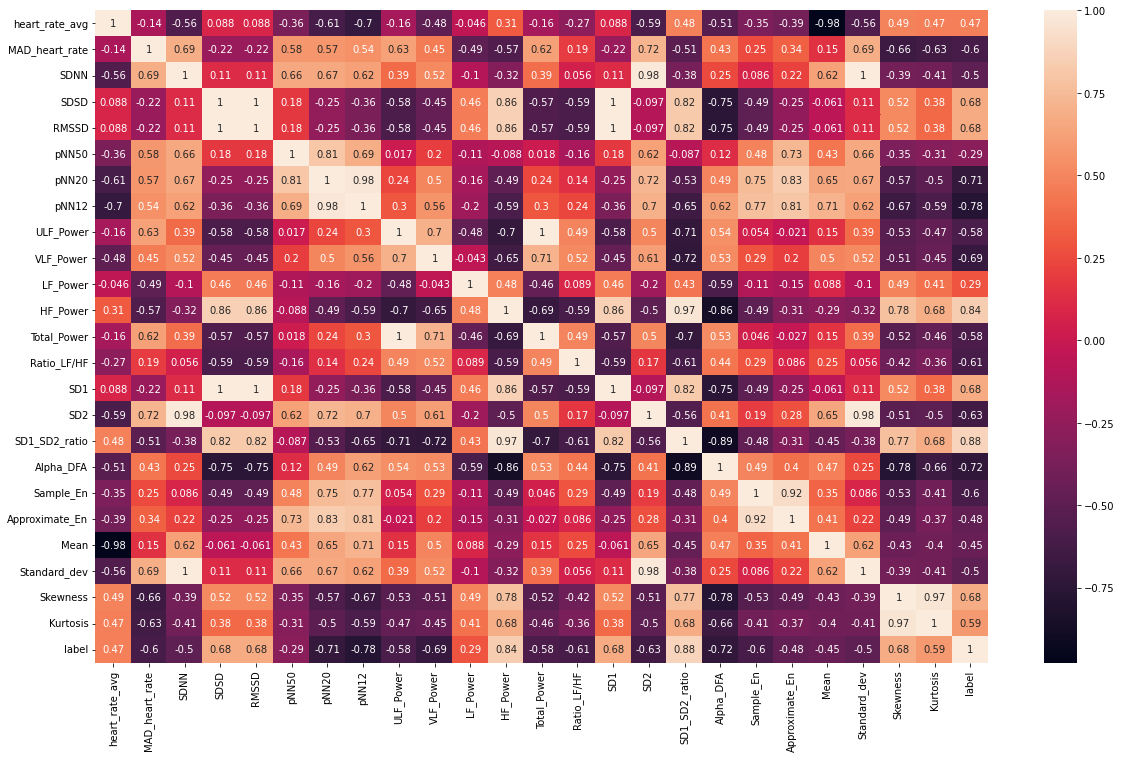

In [22]:
#checking the correlation using heatmap
plt.figure(figsize=(20,12))
sns.heatmap(features.corr(),annot=True)
plt.show()

It is evident from the heatmap that SDSD,RMSSD,SD1 have pearson's correlation coefficient value 1. Also standard_dev and SDNN have a correlation coefficent 1. So we can remove 3 features: SDSD, RMSSD and standard_dev from our dataframe.  

In [23]:
#dropping theabove specified columns
features.drop(columns=['SDSD','RMSSD','Standard_dev'],axis=1,inplace=True)

#viewing the dataframe
features

,heart_rate_avg,MAD_heart_rate,SDNN,NN50,pNN50,NN20,pNN20,NN12,pNN12,ULF_Power,...,SD1,SD2,SD1_SD2_ratio,Alpha_DFA,Sample_En,Approximate_En,Mean,Skewness,Kurtosis,label
0,63.753572,4.826335,29.352261,5764,0.076303,13587,0.179863,18843,0.249441,0.000051,...,21.151035,35.717667,0.592173,0.942103,0.515104,0.931983,238.203452,19.626250,1260.930338,1
2,68.564572,4.803938,32.455582,4298,0.053039,6199,0.076499,9793,0.120851,0.000004,...,29.231869,35.387145,0.826059,0.843486,0.215888,0.518648,222.111965,55.778400,5916.526187,1
4,101.105805,7.498499,29.278112,1591,0.013416,4228,0.035652,6993,0.058968,0.000019,...,26.288864,31.989404,0.821799,0.754400,0.187962,0.315114,150.115119,38.349184,2310.932454,1
5,102.546497,13.748364,24.411565,24028,0.202963,25197,0.212838,26840,0.226716,0.000013,...,23.553512,25.240603,0.933160,0.849141,0.862406,1.402350,150.269120,0.345203,0.972262,1
6,79.452392,7.428409,28.872988,4135,0.044491,6964,0.074930,12677,0.136400,0.000033,...,26.010566,31.476436,0.826350,0.881992,0.267006,0.538924,193.659684,16.829494,1335.130675,1
7,76.364885,5.031093,17.774836,1294,0.014253,3419,0.037660,9302,0.102460,0.000031,...,10.195113,22.976459,0.443720,0.995130,0.527919,0.681503,198.251347,0.285484,15.890362,1
8,97.342283,4.780672,22.074161,1405,0.012259,3025,0.026393,6271,0.054714,0.000006,...,20.067704,23.912984,0.839197,0.747741,0.214080,0.335295,155.273536,35.796209,2223.032589,1
9,123.766544,3.896656,9.000281,211,0.001425,264,0.001782,679,0.004584,0.000035,...,7.437692,10.329076,0.720073,0.846944,0.447108,0.537712,121.503200,58.167649,6910.214508,1
10,98.075820,9.437141,22.403936,763,0.006602,3668,0.031739,10210,0.088346,0.000122,...,8.160452,30.614965,0.266551,1.039492,0.287309,0.440660,155.740413,5.075894,261.777288,1
12,96.763737,3.805802,13.796124,5332,0.046109,12557,0.108587,13934,0.120495,0.000018,...,12.418651,15.048075,0.825265,0.821540,0.522080,0.836836,155.625000,62.274734,6489.396582,1


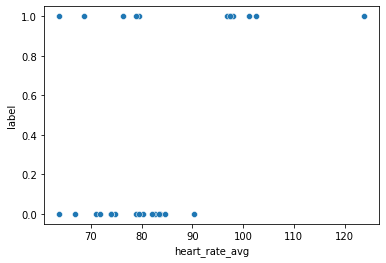

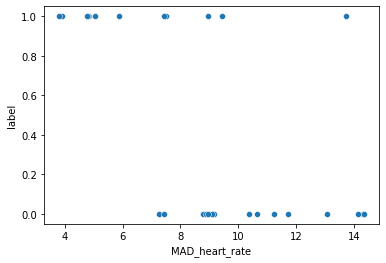

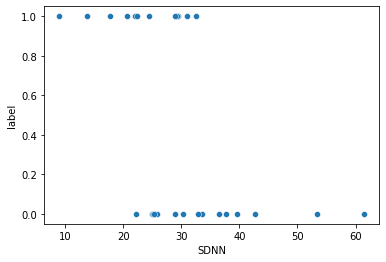

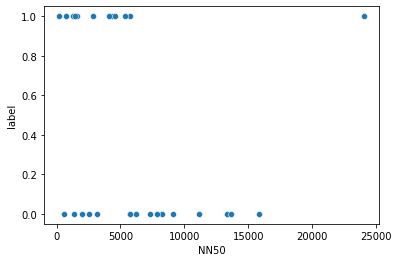

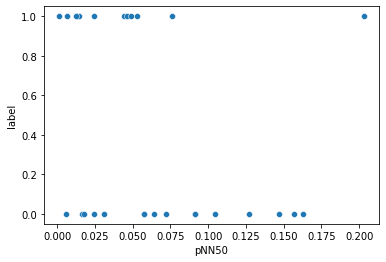

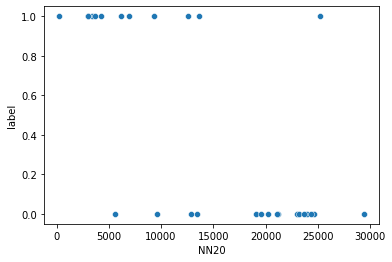

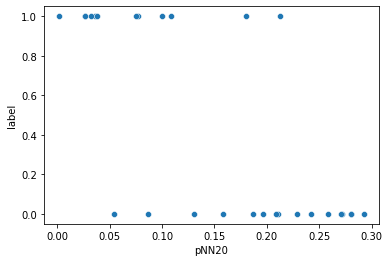

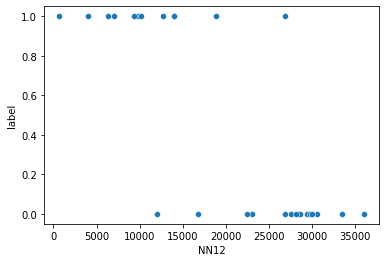

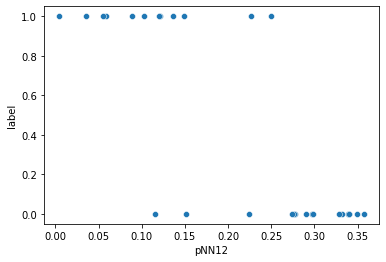

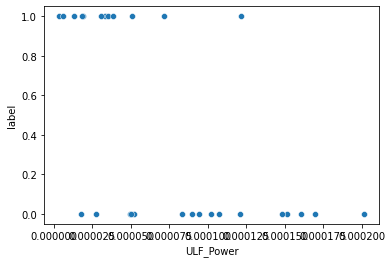

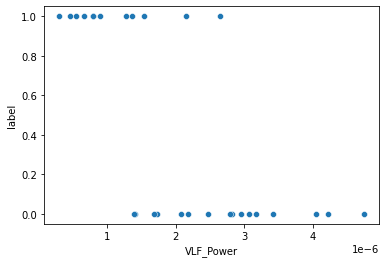

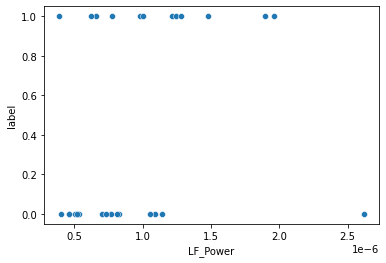

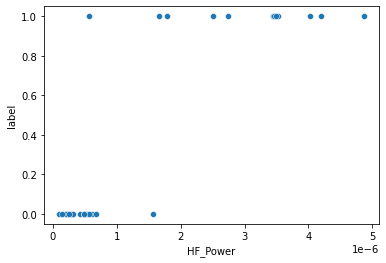

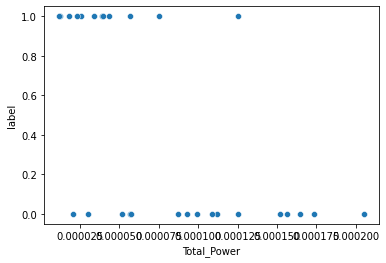

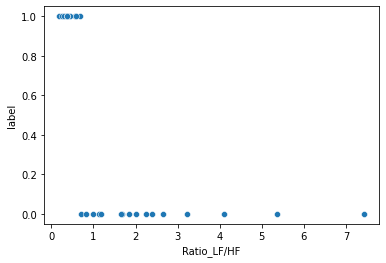

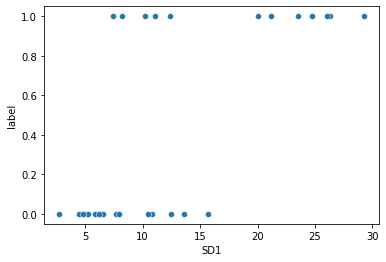

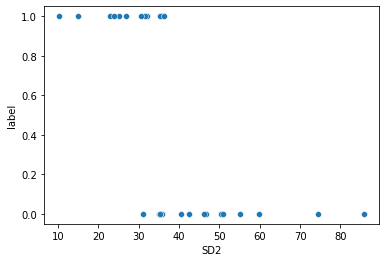

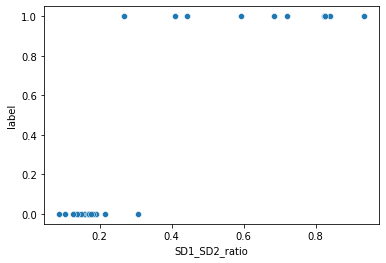

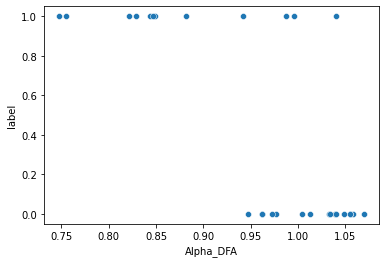

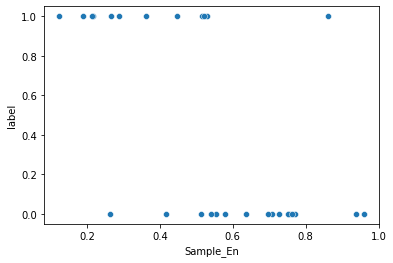

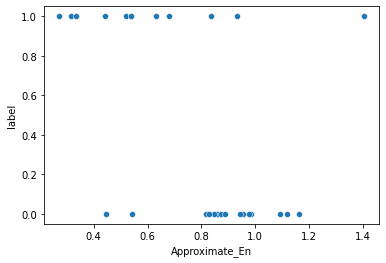

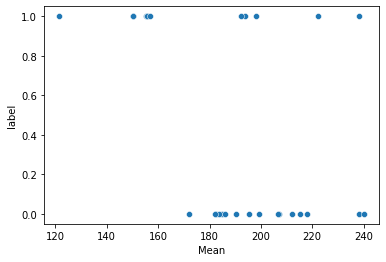

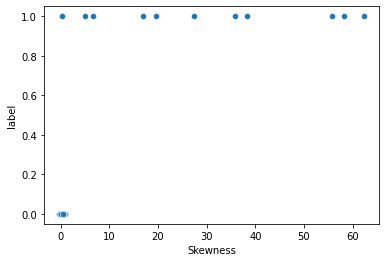

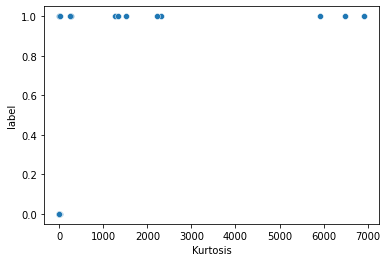

In [25]:
#we can check the features relationship with respect to our target
fet=['heart_rate_avg','MAD_heart_rate','SDNN','NN50','pNN50','NN20','pNN20','NN12','pNN12',
                                 'ULF_Power','VLF_Power','LF_Power','HF_Power','Total_Power','Ratio_LF/HF','SD1','SD2','SD1_SD2_ratio','Alpha_DFA',
                                 'Sample_En','Approximate_En','Mean','Skewness','Kurtosis']
for i in range(len(fet)):
    plt.figure()
    sns.scatterplot(x=fet[i],y='label',data=features)
    plt.show()

### Interpretations from above plots

1. The max avg_heart_rate feature for normal subjects is around 90 whereas certain CHF subjects (below 25%) have avg_heart_rate above 90
2. The MAD_heart_rate for normal subjects have a min value of 7(approx) whereas some of the CHF subjects (around 50%) fall below 7
3. The SDNN feature for majority of the normal subjects are between 25-40 values whereas for CHF subjects the max value is below 35
4. The NN50 feature for majority of the normal subjects lie between 500-9000 values whereas for CHF subjects the majority of data points lies in between 500-6000
5. The pNN50 feature for normal subjects are widely spread between 0.005-0.160 values whereas for CHF subjects the majority of the data points lie below 0.060
6. The NN20 feature for majority of the normal subjects lie between 18000-25000 values whereas for the CHF subjects it is between 3500-10000
7. The pNN20 feature for majority of the normal subjects lie between 0.18-0.29 values whereas for the CHF subjects it is between 0.03-0.12
8. The NN12 feature for majority of the normal subjects lie between 22000-31000 values whereas for the CHF subjects it is between 7000-14000
9. The pNN12 feature for majority of the normal subjects lie beyond 0.26 wheareas for the CHF subjects the entire data points are below this level.
10. The ULF_Power feature for majority of the normal subjects lie between 0.000050-0.000170 values whereas for the CHF subjects it is between 0-0.000035 
11. The VLF_Power feature for majority of the normal subjects are beyond 1.6 le(-6) wheareas for the CHF subjects the majority of the data points are below this level
12. The LF_Power feature for majority of the normal subjects are between (0.4 - 1.2) le(-6) wheareas for the CHF subjects the majority of the data points are between (0.6 - 1.5) le(-6)
13. The HF_Power feature for majority of the normal subjects are below 1 le(-6) wheareas for the CHF subjects the majority of the data points are beyond this level
14. The Total_Power feature for majority of the normal subjects are beyond the 0.000050 value wheareas for the CHF subjects the majority of the data points are below this level
15. The Ratio_LF/HF feature for normal subjects have a min value of 0.6 whereas for CHF subjects the entire datapoints are below value 1
16. The SD1 feature for majority of the normal subjects are between 4-13 value whereas for CHF subjects the entire data points are widely spread in the range 7-30 value
17. The SD2 feature for entire datapoints of the normal subjects are beyond 30 and for CHF subjects the entire data points are below 40
18. The SD1_SD2_ratio feature for majority of the normal subjects are below 0.2 whereas for CHF subjects the entire data points are beyond this level
19. The Alpha_DFA value  feature for majority of the normal subjects are beyond 0.95 whereas for CHF subjects the majority of the data points are below this level
20. The Sample_En feature for majority of the normal subjects are beyond 0.5 whereas for CHF subjects the majority of the data points are below 0.6
21. The Approximate_En feature for majority of the normal subjects are in the range 0.8-1.2 whereas for CHF subjects the majority of the data points are below 1 value
22. The Mean feature for normal subjects have a minimum value of around 170 whereas for CHF subjects it takes range from 120-240
23. The Skewness feature for normal subjects have a minimum value of -0.3 and max value 0f 0.9 whereas for CHF subjects it is widely spread from 0 to 62
24. The Kurtosis feature for normal subjects have a minimum value of -0.8 and max value 0f 5 whereas for CHF subjects the value is widely spread from 0 to 7000

#### Note: The above mentioned values are approximate but not accurate. This a graphical interpretation of statistics of entire features

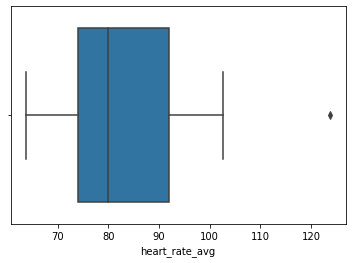

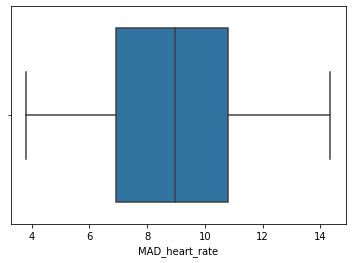

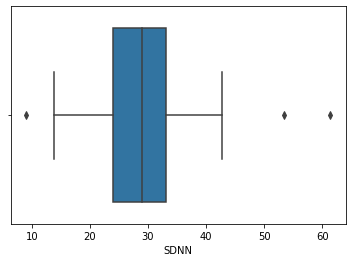

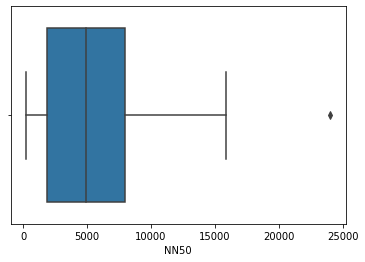

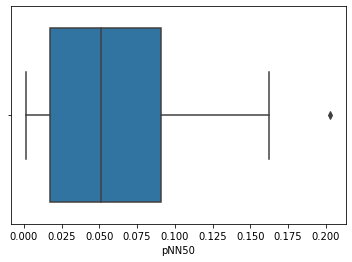

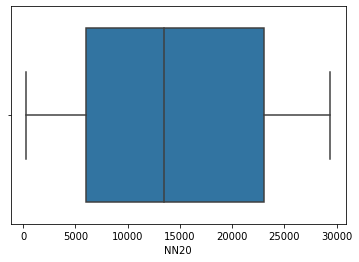

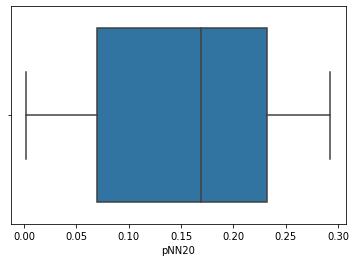

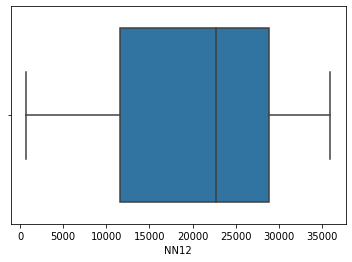

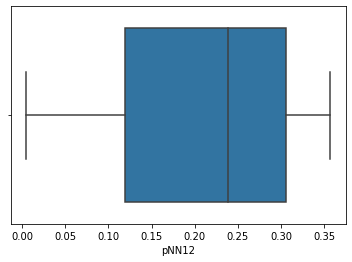

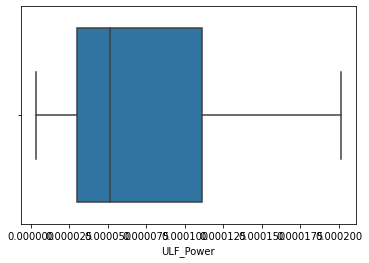

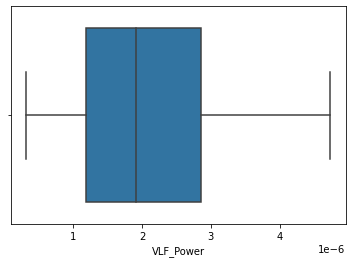

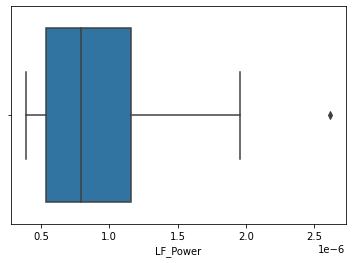

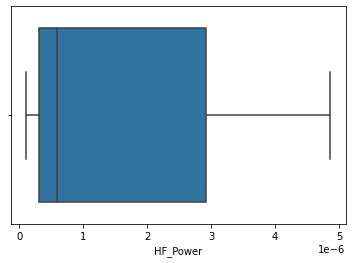

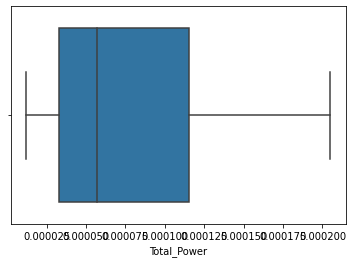

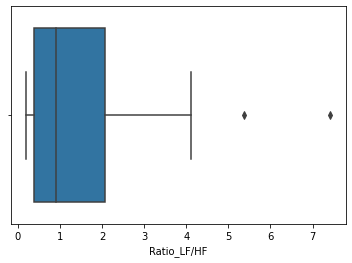

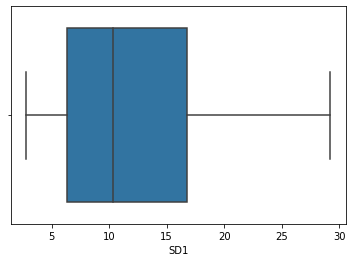

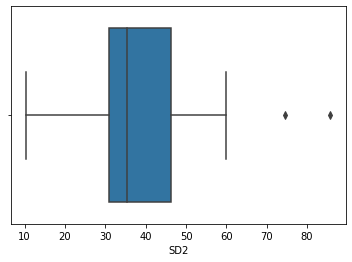

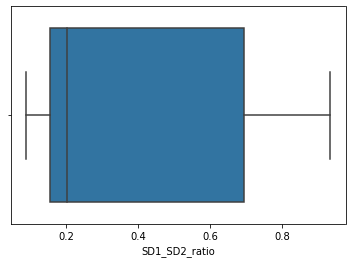

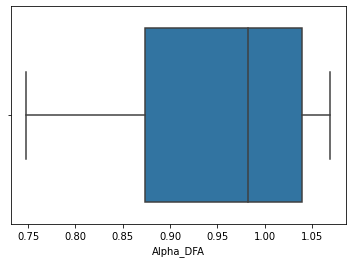

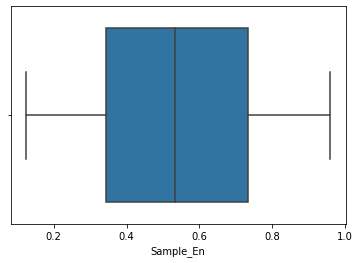

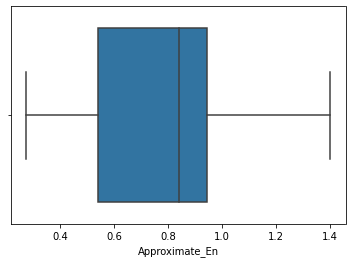

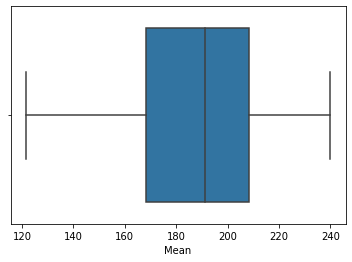

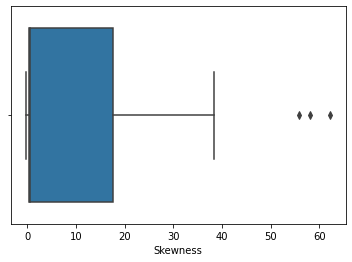

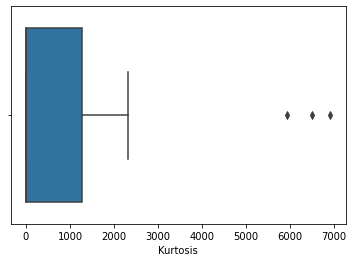

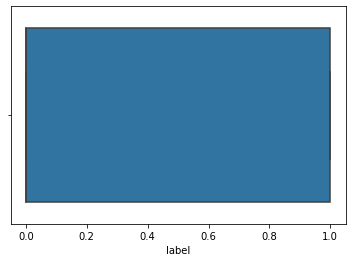

In [28]:
#visualization of boxplot for all attributes
for i in features.columns:
    plt.figure()
    sns.boxplot(features[i],orient="h")


From the boxplot we can visualize the presence of outliers. 

In [36]:
#resetting the indexes of the dataframe
features.reset_index(drop=True,inplace=True)
features

,heart_rate_avg,MAD_heart_rate,SDNN,NN50,pNN50,NN20,pNN20,NN12,pNN12,ULF_Power,...,SD1,SD2,SD1_SD2_ratio,Alpha_DFA,Sample_En,Approximate_En,Mean,Skewness,Kurtosis,label
0,63.753572,4.826335,29.352261,5764,0.076303,13587,0.179863,18843,0.249441,0.000051,...,21.151035,35.717667,0.592173,0.942103,0.515104,0.931983,238.203452,19.626250,1260.930338,1
1,68.564572,4.803938,32.455582,4298,0.053039,6199,0.076499,9793,0.120851,0.000004,...,29.231869,35.387145,0.826059,0.843486,0.215888,0.518648,222.111965,55.778400,5916.526187,1
2,101.105805,7.498499,29.278112,1591,0.013416,4228,0.035652,6993,0.058968,0.000019,...,26.288864,31.989404,0.821799,0.754400,0.187962,0.315114,150.115119,38.349184,2310.932454,1
3,102.546497,13.748364,24.411565,24028,0.202963,25197,0.212838,26840,0.226716,0.000013,...,23.553512,25.240603,0.933160,0.849141,0.862406,1.402350,150.269120,0.345203,0.972262,1
4,79.452392,7.428409,28.872988,4135,0.044491,6964,0.074930,12677,0.136400,0.000033,...,26.010566,31.476436,0.826350,0.881992,0.267006,0.538924,193.659684,16.829494,1335.130675,1
5,76.364885,5.031093,17.774836,1294,0.014253,3419,0.037660,9302,0.102460,0.000031,...,10.195113,22.976459,0.443720,0.995130,0.527919,0.681503,198.251347,0.285484,15.890362,1
6,97.342283,4.780672,22.074161,1405,0.012259,3025,0.026393,6271,0.054714,0.000006,...,20.067704,23.912984,0.839197,0.747741,0.214080,0.335295,155.273536,35.796209,2223.032589,1
7,123.766544,3.896656,9.000281,211,0.001425,264,0.001782,679,0.004584,0.000035,...,7.437692,10.329076,0.720073,0.846944,0.447108,0.537712,121.503200,58.167649,6910.214508,1
8,98.075820,9.437141,22.403936,763,0.006602,3668,0.031739,10210,0.088346,0.000122,...,8.160452,30.614965,0.266551,1.039492,0.287309,0.440660,155.740413,5.075894,261.777288,1
9,96.763737,3.805802,13.796124,5332,0.046109,12557,0.108587,13934,0.120495,0.000018,...,12.418651,15.048075,0.825265,0.821540,0.522080,0.836836,155.625000,62.274734,6489.396582,1


In [37]:
#saving the datframe to a csv
features.to_csv('Cleaned_features.csv',columns=['heart_rate_avg','MAD_heart_rate','SDNN','NN50','pNN50','NN20','pNN20','NN12','pNN12',
                                 'ULF_Power','VLF_Power','LF_Power','HF_Power','Total_Power','Ratio_LF/HF','SD1','SD2','SD1_SD2_ratio','Alpha_DFA',
                                 'Sample_En','Approximate_En','Mean','Skewness','Kurtosis','label'])

In [39]:
#reading the dataframe from the stored file
df=pd.read_csv('Cleaned_features.csv')
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

# #using z score to detect the shape of the dataframe after removing outliers
from scipy.stats import zscore
z_score=np.abs(zscore(df))
print(df.shape)

rem_outl=df.loc[(z_score<3).all(axis=1)]
print(rem_outl.shape)

(28, 25)
(24, 25)


In [40]:
#we can save this data after outlier removal into the old dataframe 'df'
df=rem_outl
df.shape   #checking the shape

(24, 25)

In the above codes we have used the zscore method of removing outliers.The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. The data is rescaled and a threshold of -3 to +3 is used. If the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

With the zscore method we have removed 4 data points from our actual data.

In [41]:
#seperating the dependent and independent variables
y=df['label']
df_x=df.iloc[:,0:-1]

In [42]:
#viewing the dataframe with input variables
df_x

,heart_rate_avg,MAD_heart_rate,SDNN,NN50,pNN50,NN20,pNN20,NN12,pNN12,ULF_Power,...,Ratio_LF/HF,SD1,SD2,SD1_SD2_ratio,Alpha_DFA,Sample_En,Approximate_En,Mean,Skewness,Kurtosis
0,63.753572,4.826335,29.352261,5764,0.076303,13587,0.179863,18843,0.249441,0.000051,...,0.345763,21.151035,35.717667,0.592173,0.942103,0.515104,0.931983,238.203452,19.626250,1260.930338
1,68.564572,4.803938,32.455582,4298,0.053039,6199,0.076499,9793,0.120851,0.000004,...,0.389696,29.231869,35.387145,0.826059,0.843486,0.215888,0.518648,222.111965,55.778400,5916.526187
2,101.105805,7.498499,29.278112,1591,0.013416,4228,0.035652,6993,0.058968,0.000019,...,0.568243,26.288864,31.989404,0.821799,0.754400,0.187962,0.315114,150.115119,38.349184,2310.932454
4,79.452392,7.428409,28.872988,4135,0.044491,6964,0.074930,12677,0.136400,0.000033,...,0.243822,26.010566,31.476436,0.826350,0.881992,0.267006,0.538924,193.659684,16.829494,1335.130675
5,76.364885,5.031093,17.774836,1294,0.014253,3419,0.037660,9302,0.102460,0.000031,...,0.435931,10.195113,22.976459,0.443720,0.995130,0.527919,0.681503,198.251347,0.285484,15.890362
6,97.342283,4.780672,22.074161,1405,0.012259,3025,0.026393,6271,0.054714,0.000006,...,0.297628,20.067704,23.912984,0.839197,0.747741,0.214080,0.335295,155.273536,35.796209,2223.032589
8,98.075820,9.437141,22.403936,763,0.006602,3668,0.031739,10210,0.088346,0.000122,...,0.691091,8.160452,30.614965,0.266551,1.039492,0.287309,0.440660,155.740413,5.075894,261.777288
9,96.763737,3.805802,13.796124,5332,0.046109,12557,0.108587,13934,0.120495,0.000018,...,0.366074,12.418651,15.048075,0.825265,0.821540,0.522080,0.836836,155.625000,62.274734,6489.396582
10,78.874535,5.875292,20.579016,4562,0.048705,9343,0.099748,13988,0.149339,0.000071,...,0.377495,11.031910,26.931256,0.409632,0.987341,0.361689,0.633057,192.158681,6.547338,243.267561
11,97.370748,8.948402,31.009500,2817,0.024558,3024,0.026362,4027,0.035106,0.000038,...,0.589398,24.778503,36.183013,0.684810,0.828905,0.123722,0.272389,156.859079,27.304152,1524.585459


In [112]:
#lets standardise the inputs using standard scaler before training into the model
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [113]:
#Now x are our inputs and y is the output label to be predicted
#applying train-test-split
#splitting the input and target variable into test and train data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=47,stratify=y)
print("Shape of input parameters for training: ",x_train.shape," and for testing: ",x_test.shape)

print("Shape of output parameters for training: ",y_train.shape," and for testing: ",y_test.shape)

Shape of input parameters for training:  (19, 24)  and for testing:  (5, 24)
Shape of output parameters for training:  (19,)  and for testing:  (5,)


In [114]:
#importing necessary libraries for models and metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#importing boosting models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

#evaluation metrices
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,log_loss,roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score, RepeatedStratifiedKFold

In [115]:
#looping all the algorithms
model=[SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    loss = log_loss(y_test,predm)
    print('Accuracy score of',m,'is: ',accuracy_score(y_test,predm))
    print('Confusion matrix:')
    print(confusion_matrix(y_test,predm))
    print('Classification report:')
    print(classification_report(y_test,predm))
    print("Log loss of",m,"is:",loss)
    print('******************************************************')
    print('\n')


Accuracy score of SVC() is:  0.8
Confusion matrix:
[[2 1]
 [0 2]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.67      1.00      0.80         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5

Log loss of SVC() is: 6.907915198468176
******************************************************


Accuracy score of DecisionTreeClassifier() is:  1.0
Confusion matrix:
[[3 0]
 [0 2]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

Log loss of DecisionTreeClassifier() is: 9.992007221

In [117]:
from sklearn.model_selection import RepeatedStratifiedKFold

final_models = []
final_models.append(('DTC', DecisionTreeClassifier())) 
final_models.append(('KNN', KNeighborsClassifier())) 
final_models.append(('RFC', RandomForestClassifier())) 
final_models.append(('GBC', GradientBoostingClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in final_models:
    kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats = 3, random_state=47)
    cv_results = cross_val_score(model, x, y, cv=kfold, scoring='accuracy') 
    results.append(cv_results)
    names.append(name)
    print("%s: %.2f (%.3f)" % (name, cv_results.mean(), cv_results.std()))
    

DTC: 0.89 (0.208)
KNN: 0.96 (0.136)
RFC: 0.96 (0.136)
GBC: 0.86 (0.214)


Both KNN classifier model  and RFC model have a mean cross-validation score of 0.96 and a std of 0.136.

In [118]:
#creating final model
MODEL=KNeighborsClassifier()
MODEL.fit(x_train,y_train)
MODEL.score(x_train,y_train)
pred_m=MODEL.predict(x_test)
loss_m = log_loss(y_test,pred_m)
print('Accuracy score of',MODEL,'is: ',accuracy_score(y_test,pred_m))
print('Confusion matrix:')
print(confusion_matrix(y_test,pred_m))
print('Classification report:')
print(classification_report(y_test,pred_m))
print("Log loss of",MODEL,"is:",loss_m)

Accuracy score of KNeighborsClassifier() is:  1.0
Confusion matrix:
[[3 0]
 [0 2]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

Log loss of KNeighborsClassifier() is: 9.992007221626415e-16


In [120]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 5))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(MODEL, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(x_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
{'n_neighbors': 1}
KNeighborsClassifier(n_neighbors=1)


In [121]:
#the best no of neighbors parameter for knn is 1. We can create the final model with the obtained parameter 
#parameter optimised model
MODEL=KNeighborsClassifier(n_neighbors=1)
MODEL.fit(x_train,y_train)
MODEL.score(x_train,y_train)
pred_m=MODEL.predict(x_test)
loss_m = log_loss(y_test,pred_m)
print('Accuracy score of',MODEL,'is: ',accuracy_score(y_test,pred_m))
print('Confusion matrix:')
print(confusion_matrix(y_test,pred_m))
print('Classification report:')
print(classification_report(y_test,pred_m))
print("Log loss of",MODEL,"is:",loss_m)

Accuracy score of KNeighborsClassifier(n_neighbors=1) is:  1.0
Confusion matrix:
[[3 0]
 [0 2]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

Log loss of KNeighborsClassifier(n_neighbors=1) is: 9.992007221626415e-16


Accuracy score is 1.0 which is 100%. Ideally it must be close to 1. Since we have lesser amount of data these models are overfitted. Let's try PCA by reducing the number components to 10 

True positive value is 3 and True negative value is 2.
True Positive value is the count of predicted positives which are actually positive 
True Negative value is the ccount of preddicted negatives which are actually negative

precision and recall scores are 1

Precision is the accuracy of positive predictions  i.e, [TP/(TP+FP)]
Recall is the measure of classifier to correctly identitfy positive instances i.e, [TP/TP+FN]

Log loss is the negative average of the log of corrected predicted probabilities for each instance. The lower value of log loss indicates the better performance of a model 


In [122]:
#performing pca and again training the models

ds_ip=df_x
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
ds_ip=pca.fit_transform(ds_ip)

x_train,x_test,y_train,y_test=train_test_split(ds_ip,y,test_size=.2,random_state=47,stratify=y)

#looping all the algorithms
model1=[SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]

for m in model1:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm1=m.predict(x_test)
    lossm1 = log_loss(y_test,predm)
    print('Accuracy score of',m,'is: ',accuracy_score(y_test,predm1))
    print('Confusion matrix:')
    print(confusion_matrix(y_test,predm1))
    print('Classification report:')
    print(classification_report(y_test,predm1))
    print("Log loss of",m,"is:",lossm1)
    print('******************************************************')
    print('\n')


Accuracy score of SVC() is:  0.8
Confusion matrix:
[[2 1]
 [0 2]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.67      1.00      0.80         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5

Log loss of SVC() is: 9.992007221626415e-16
******************************************************


Accuracy score of DecisionTreeClassifier() is:  0.8
Confusion matrix:
[[2 1]
 [0 2]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.67      1.00      0.80         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5

Log loss of DecisionTreeClassifier() is: 9.99200

After performing PCA all these models are having same performances in terms of accuracy,precison,recall and log loss. Let's take SVC and perform parameter tuning

In [123]:
svc=SVC()
parameters = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001], 
              'kernel': ['rbf','linear','poly']}  
  
grid = GridSearchCV(estimator=svc, param_grid=parameters,scoring='accuracy') 
  
# fitting the model for grid search 
grid.fit(x, y) 
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [125]:
#creating svc model
svc_model=SVC(C=0.1,gamma=1,kernel='linear')
svc_model.fit(x_train,y_train)
svc_model.score(x_train,y_train)
pred_svc=svc_model.predict(x_test)
loss_svc = log_loss(y_test,pred_svc)
print('Accuracy score of',svc_model,'is: ',accuracy_score(y_test,pred_svc))
print('Confusion matrix:')
print(confusion_matrix(y_test,pred_svc))
print('Classification report:')
print(classification_report(y_test,pred_svc))
print("Log loss of",svc_model,"is:",loss_svc)

Accuracy score of SVC(C=0.1, gamma=1, kernel='linear') is:  0.8
Confusion matrix:
[[2 1]
 [0 2]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.67      1.00      0.80         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5

Log loss of SVC(C=0.1, gamma=1, kernel='linear') is: 6.907915198468176


There is no significant difference in terms of performances before and after parameter tuning. The log loss has been increased

## Final model



In [127]:
#final model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=47,stratify=y)
MODEL=KNeighborsClassifier(n_neighbors=1)
MODEL.fit(x_train,y_train)
MODEL.score(x_train,y_train)
pred_m=MODEL.predict(x_test)
loss_m = log_loss(y_test,pred_m)
print('Accuracy score of',MODEL,'is: ',accuracy_score(y_test,pred_m))
print('Confusion matrix:')
print(confusion_matrix(y_test,pred_m))
print('Classification report:')
print(classification_report(y_test,pred_m))
print("Log loss of",MODEL,"is:",loss_m)

Accuracy score of KNeighborsClassifier(n_neighbors=1) is:  1.0
Confusion matrix:
[[3 0]
 [0 2]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

Log loss of KNeighborsClassifier(n_neighbors=1) is: 9.992007221626415e-16


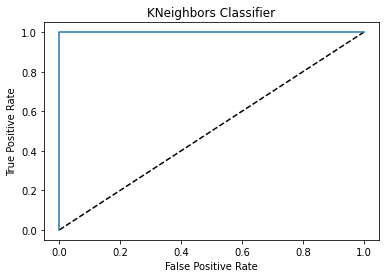

auc score:  1.0


In [129]:
#ROC curve
#predicted probabilities 
y_pred_prob=MODEL.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighbors Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNeighbors Classifier')
plt.show()

#auc score
auc_score=roc_auc_score(y_test,MODEL.predict(x_test))
print('auc score: ',auc_score)

The auc score indicates the measure of seperability between two different classes. Here this model is having a score of 1.0 in terms of classifying CHF and Normal subjects.

In [130]:
#saving the model
import joblib
joblib.dump(MODEL,'HRV_analysis.pkl')

['HRV_analysis.pkl']

### Visualisation of annotation files

         N     ~      |   V  F   S  J
0   100216   453    259  16  6   5  0
1    87757  2123   7265   0  0   1  0
2    89840   200     52   0  0   5  0
3   102061   296     73   2  0   4  0
4   104330   131     96   0  0   4  0
5   108265   345     47   0  0  17  0
6    81962   126  30782   0  0  27  0
7   101605    84     40   3  2   5  0
8    86872   120    686   0  0   0  0
9    87354   350    296   0  0   2  0
10  100655   407    108   0  0   3  0
11  115908   267    826   0  0   3  0
12  102313   186    173   0  0   0  0
13   97957   733  19186   2  0   2  0
14   81382   281    281   0  0   7  2
15   75100   140   8424   3  0   3  0
16   96596   152    244   0  0   0  0
17  109329   701   1230   0  0   3  0


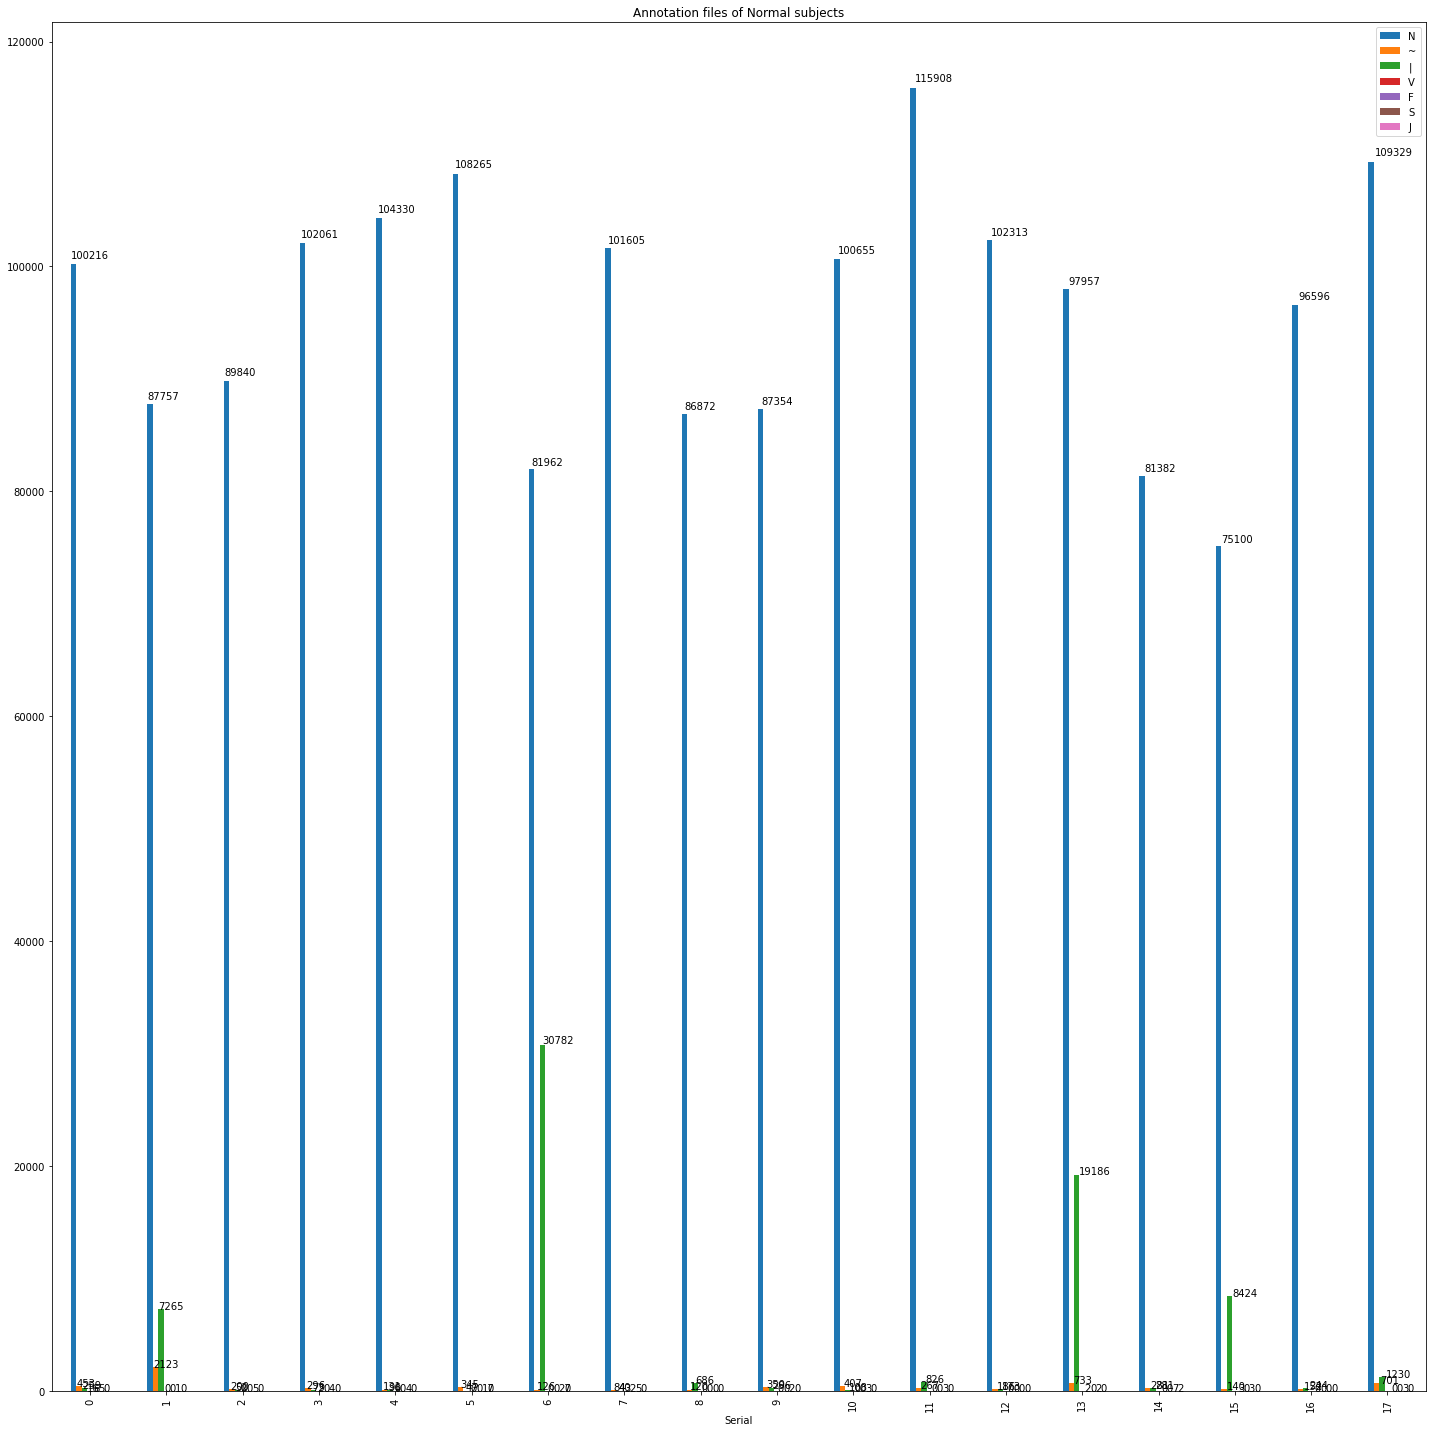

In [131]:
csv_files=glob.glob('normal/*resampled_annotations.csv')
ann_types=pd.DataFrame(columns=['N','~','|','V','F','S','J'])
for i in range(len(csv_files)):
    df=pd.DataFrame()
    df=pd.read_csv(csv_files[i],names=['sample','symbol','subtype','chan','num','aux_note'])
    dic={}
    dic= pd.Series.to_dict((pd.Series(df['symbol']).value_counts()))
    ds=pd.DataFrame(dic,index=[0,],columns=['N','~','|','V','F','S','J'])
    ann_types=ann_types.append(ds,ignore_index=True)
    
ann_types.fillna(0,inplace=True)
print(ann_types)

l1=[i for i in range(0,18)]
for k in l1:
    ann_types['Serial']=l1
ax=ann_types.plot(x='Serial',y=['N','~','|','V','F','S','J'],kind='bar',title='Annotation files of Normal subjects',figsize=(20,20))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()  * 1.005 , p.get_height()  * 1.005))    # * 1.005
plt.tight_layout()
plt.show()

Annotations:
1. N - Normal Beat (Beat annotation)
2. ~ - change in signal quality (Non-Beat annotation)
3. | - isolated QRS like artifacts (Non-Beat annotation)
4. V - Premature Ventricular Contraction (Beat-annotation)
5. F - Fusion of ventricular and normal beat (Beat annotation)
6. S - Supraventricular premature or ectopic beat (Beat annotation)
7. J - Nodal (junctional) premature beat


         N     S      V     r    +    Q  E
0    74985   293    240    28    2    0  0
1    91031     3  23510     0    0    4  0
2    78722   461   1302   689    0  125  2
3   110774   280   1312     0    0    0  0
4   118463   104     45   538    0    2  1
5   111894  3083    772  2635  250    0  0
6    90503   194     96  1767    0   24  0
7    89577   128    703   318    0   33  0
8   114096   161      5   730    0   60  0
9   146819   410      0    68    4    4  0
10  115098    51     61   426    0    3  0
11  115092    16      1    18    0    0  0
12  115230    11      3   401    0    5  0
13   93502    38     53    50    2   31  0
14  112365    81     63  2685    0    2  2


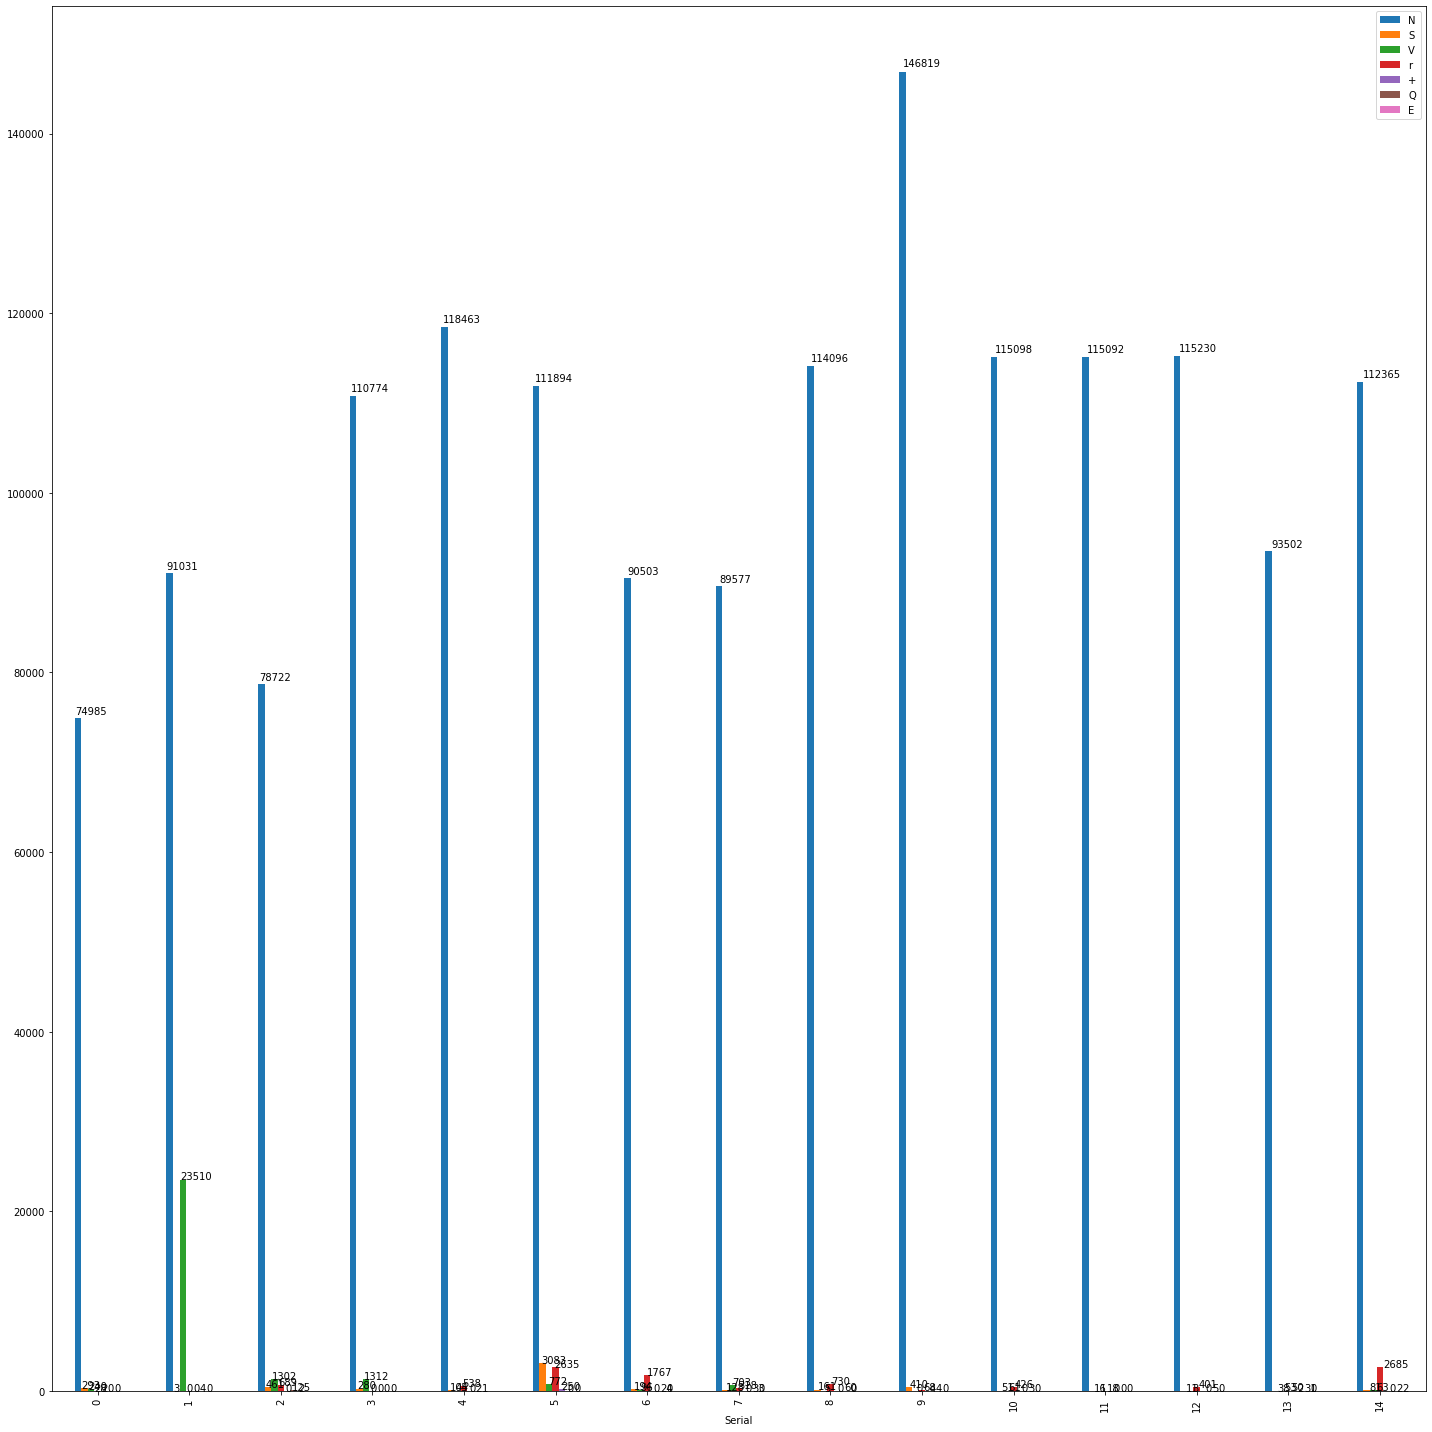

In [132]:
csv_files=glob.glob('files/*annotations.csv')          #the folder has a file Records_annotations which is also identified in csv_files list
ann_types=pd.DataFrame(columns=['N','S','V','r','+','Q','E'])
for i in range(len(csv_files)-1):
    df=pd.DataFrame()
    df=pd.read_csv(csv_files[i],names=['sample','symbol','subtype','chan','num','aux_note'])
    dic={}
    dic= pd.Series.to_dict((pd.Series(df['symbol']).value_counts()))
    ds=pd.DataFrame(dic,index=[0,],columns=['N','S','V','r','+','Q','E'])
    ann_types=ann_types.append(ds,ignore_index=True)
    
ann_types.fillna(0,inplace=True)                #filling 0 in place of nan values
print(ann_types)

l1=[i for i in range(0,15)]
for k in l1:
    ann_types['Serial']=l1
ax=ann_types.plot(x='Serial',y=['N','S','V','r','+','Q','E'],kind='bar',figsize=(20,20))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()  * 1.005 , p.get_height()  * 1.005))    # * 1.005
plt.tight_layout()
plt.show()

Annotations:
1. N - Normal Beat (Beat annotation)
2. S - Supraventricular premature or ectopic beat (Beat annotation)
3. V - Premature Ventricular Contraction (Beat-annotation)
4. r - R-on-T premature ventricular contraction (Beat annotation)
5. '+' - Rhythm change (Non-Beat annotation)
6. Q - Unclassifiable Beat (Beat annotation)
7. E - Ventricular escape beat (Beat annotation)

Supraventricular premature and Premature Ventricular contractions are predominantly seen 

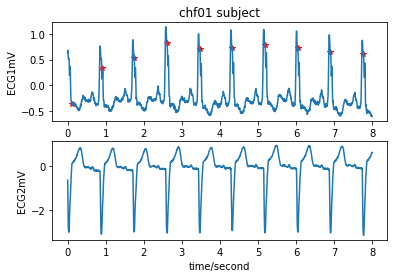

In [2]:
#sample view of indexes of annotation records of a signal upto 2000 samples
samp_record = wfdb.rdrecord('files/chf01', sampto = 2000)
samp_annotation = wfdb.rdann('files/chf01', 'ecg', sampto = 2000)

wfdb.plot_wfdb(record=samp_record, annotation=samp_annotation,title='chf01 subject',time_units='seconds')

The annotations at a point of time present within the signal is marked by the red marker. 